In [102]:
! git remote add origin https://github.com/caroschwedh/BIOF309-final-project.git
! git push -u origin master

fatal: remote origin already exists.
error: src refspec master does not match any
error: failed to push some refs to 'git@github.com:caroschwedh/BIOF309-final-project.git'


### Step 1: download pregenerated dataset from iNaturalist as follows:

1. Go to iNaturalist.org and sign into your account.
2. Go to observations > export and create a Query with the following criteria in the following fields:

    Filter: quality grade Research
    
    Place: DMV, US
    
    Taxon: Apis mellifera
    
3. Create export

### Step 2: unzip and upload dataset to project folder

And make sure you are in the right directory:

In [1]:
!pwd

/c/Users/schwedhelmramc2/Documents/Python Scripts/Final project


### Step 3: import necessary packages and functions

In [86]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

Import dataset

In [3]:
DMV_bees = pd.read_csv('observations-71449.csv', header=0, parse_dates=True, squeeze=True)

In [61]:
DMV_bees.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,out_of_range,user_id,user_login,created_at,updated_at,...,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,count
0,330317,4/26/2013 12:10,2013-04-26,2013-04-26 16:10:28 UTC,Eastern Time (US & Canada),NaN,14389,sdroege,2013-07-12 19:32:49 UTC,2017-11-09 19:02:58 UTC,...,NaN,False,NaN,NaN,Honey Bee,Apis mellifera,Western Honey Bee,Insecta,47219,1
1,330329,4/25/2013 17:25,2013-04-25,2013-04-25 21:25:16 UTC,Eastern Time (US & Canada),NaN,14389,sdroege,2013-07-12 19:38:12 UTC,2017-11-09 19:03:00 UTC,...,NaN,False,NaN,NaN,Honey Bee,Apis mellifera,Western Honey Bee,Insecta,47219,1
2,534926,9/22/2012 10:16,2012-09-22,2012-09-22 14:16:01 UTC,Eastern Time (US & Canada),NaN,30601,calopteryx,2014-02-18 04:55:08 UTC,2017-11-09 19:24:06 UTC,...,NaN,False,NaN,NaN,Apis mellifera,Apis mellifera,Western Honey Bee,Insecta,47219,1
3,548320,6/11/2013 6:20,2013-06-11,2013-06-11 10:20:18 UTC,Eastern Time (US & Canada),NaN,30601,calopteryx,2014-03-02 04:21:14 UTC,2017-11-09 19:26:51 UTC,...,NaN,False,NaN,NaN,Apis mellifera,Apis mellifera,Western Honey Bee,Insecta,47219,1
4,775199,7/8/2014 18:00,2014-07-08,2014-07-08 22:00:00 UTC,Eastern Time (US & Canada),NaN,31092,ecologyelise,2014-07-08 22:25:03 UTC,2018-12-12 06:28:44 UTC,...,NaN,True,NaN,NaN,Western Honey Bee,Apis mellifera,Western Honey Bee,Insecta,47219,1


### Step 4: 

Create season variable
Adjust number of observations by user_id

In [ ]:
#convert pandas series to dataframe
df_bees = pd.DataFrame({'observed_on':DMV_bees.observed_on, 'user_id':DMV_bees.user_id})
# Observation count variable
df_bees['count'] = 1

print(df_bees.head())

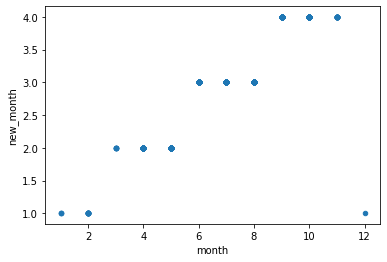

In [72]:
# Create season variable as new_month (1 for Dec-Feb, 2 for Mar-May, 3 for Jun-Aug, 4 for Sep-Nov)
df_bees['observed_on'] = df_bees.observed_on.astype(str)
df_bees['month'] = df_bees.observed_on.str.slice(start=5, stop=7).astype(int)
df_bees['new_month'] = df_bees.month.apply(lambda x: (x%12 + 3)//3)

# check
df_bees.plot.scatter(x='month',y='new_month')

In [96]:
# now rename to season names
df_bees.loc[df_bees['new_month'] ==2, 'season'] = 'spring'
df_bees.loc[df_bees['new_month'] ==3, 'season'] = 'summer'
df_bees.loc[df_bees['new_month'] ==4, 'season'] = 'fall'
df_bees.loc[df_bees['new_month'] ==1, 'season'] = 'winter'

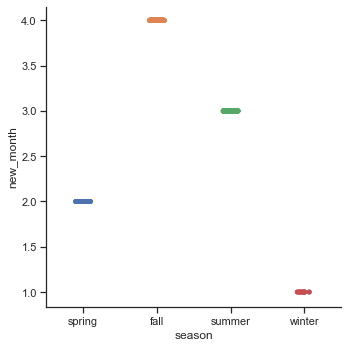

In [97]:
# check
#sns.catplot(x="season", y="new_month", jitter=False, data=df_bees);
sns.catplot(x="season", y="new_month", data=df_bees)

In [ ]:
def season_func()
    """ """
    
    
    

In [17]:
DMV_bees['year'] = observed_on.str.slice(-4,)
DMV_bees['day'] = observed_on.str.slice(-7,-4)
DMV_bees['month'] = observed_on.str.slice(0,2)

DMV_bees['month'] = DMV_bees['month'].str.replace("/", "")
DMV_bees['day'] = DMV_bees['day'].str.replace("/", "")

AttributeError: Can only use .str accessor with string values!

In [12]:
def merge(list1, list2): 
      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

# Driver code 
list1 = list(DMV_bees['month'])
list2 = list(DMV_bees['day'])
DMV_bees['mo_day'] = merge(list1, list2)

In [172]:
type(DMV_bees['mo_day'])

pandas.core.series.Series

In [15]:
#season = "spring"
for x in DMV_bees['mo_day']:
   if 
  print("this is a spring month: " + x[0])
    
   # if x[0] == '4' or x[0] == '5':
    #    season += "spring"
    #else:
    #    season += "other"
   #     print(season)
#season = lambda x: 'spring' if x[0] == '4' or x[0] == '5'

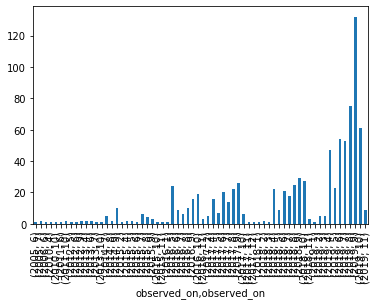

In [14]:
DMV_bees["observed_on"] = DMV_bees["observed_on"].astype("datetime64")
DMV_bees["observed_on"].groupby([DMV_bees["observed_on"].dt.year, DMV_bees["observed_on"].dt.month]).count().plot(kind="bar")

In [26]:
datetime

datetime.datetime

In [30]:
DMV_bees.

0      2013-04-26 00:00:00
1      2013-04-25 00:00:00
2      2012-09-22 00:00:00
3      2013-06-11 00:00:00
4      2014-07-08 00:00:00
              ...         
881    2019-11-06 00:00:00
882    2019-11-07 00:00:00
883    2019-11-20 00:00:00
884    2019-09-21 00:00:00
885    2011-10-18 00:00:00
Name: observed_on, Length: 886, dtype: object

In [19]:
seasons = {'Summer':(datetime(2014,6,21), datetime(2014,9,22)),
           'Autumn':(datetime(2014,9,23), datetime(2014,12,20)),
           'Spring':(datetime(2014,3,21), datetime(2014,6,20))}

def get_season(month,day):
    for season,(season_start, season_end) in seasons.items():
        if observed_on >= season_start and observed_on <= season_end:
            return season
    else:
        return 'Winter'

In [20]:
print(get_season(DMV_bees['month'],DMV_bees['day']))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [266]:
for value in DMV_bees["observed_on"]:
    new_date = value(range(0,4)) + value(range(5,7)) + value(range(8,10))
    print(new_date.head())


TypeError: 'str' object is not callable

In [26]:
# create season variable
DMV_bees['season'] = ('spring' if DMV_bees['month'] == 3)

#   if value[range(5,6)] >= '03' and value[range(8,9)] <= '21'
 #   print(spring)

SyntaxError: invalid syntax (<ipython-input-26-7a1edc5d04d1>, line 2)

In [85]:
# iterate over all the elements 
def iterate_obs(item):
    """ iterate over all the elements """
    for item in observed_on.iteritems(): 
        return observed_on

In [10]:
df_bees.head()

,observed_on,user_id
0,4/26/2013,14389
1,4/25/2013,14389
2,9/22/2012,30601
3,6/11/2013,30601
4,7/8/2014,31092
